In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
from matplotlib.gridspec import GridSpec

from heliopy.data import ace

import helpers
import importlib
importlib.reload(helpers)

<module 'helpers' from '/Users/dstansby/github/publication-code/2020-eis-tracing/helpers.py'>

In [2]:
from fig_params import figwidth, figdir, fontsize
matplotlib.rcParams['font.size'] = fontsize

Download some in-situ ACE data
---
The in-situ solar wind speed is used to track ballistaically back to the source surface.

In [3]:
starttime = helpers.ace_dates[0]
endtime = helpers.ace_dates[1]

data = ace.swi_h3b(starttime, endtime)
v_alpha = data.quantity('vHe2')

Load synoptic magnetic field map
---
This is GONG, but in theory can be swapped out for any other synoptic solar magnetic field map.

In [4]:
synoptic_map = helpers.get_B_map()

Trace magnetic field down to the solar surface
---

In [5]:
flines, pfss_input, pfss_output = helpers.footpoints(data.index, v_alpha, synoptic_map)

Computing PFSS...
Tracing field lines...


Create figure
---

Text(0, 0.5, 'Gauss')

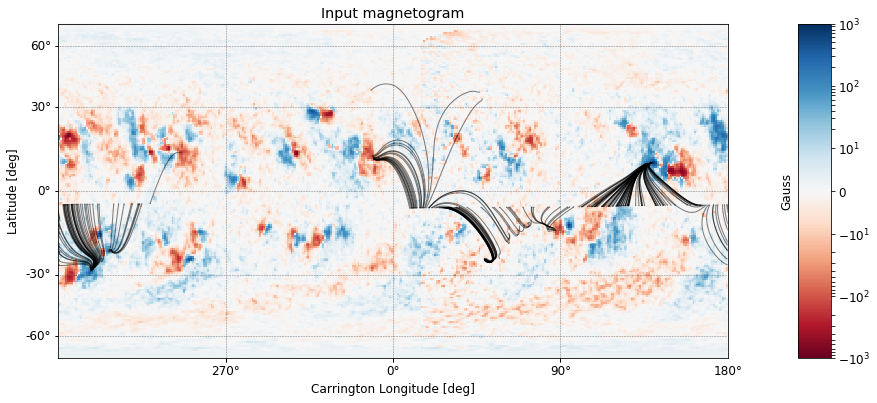

In [10]:
# Magnetogram plot settings
norm = mcolor.SymLogNorm(linthresh=10, linscale=1)
cmap = 'RdBu'
clim = 1e3

# Set plot layout and size
gs = GridSpec(1, 2, width_ratios=[20, 1])
fig = plt.figure(figsize=(2 * figwidth, figwidth))

# Plot input map
magnetogram = pfss_input.map
ax = fig.add_subplot(gs[0, 0], projection=magnetogram)
im = magnetogram.plot(axes=ax, norm=norm, cmap=cmap,
                      rasterized=True, vmin=-clim, vmax=clim)
ax.coords.grid(color='black', linestyle='--', alpha=0.5)
ax.set_title('Input magnetogram')
ax.set_xlim(-0.49)
# Plot field line traces
for fline in flines.open_field_lines:
    importlib.reload(helpers)
    coords = helpers.wrap_field_line(fline.coords)
    ax.plot_coord(coords, lw=1, color='k', alpha=0.5)

# Plot colourbar
ax = fig.add_subplot(gs[0, 1])
fig.colorbar(im, cax=ax)
ax.set_aspect(10)
ax.set_ylabel('Gauss', labelpad=-90)

In [11]:
# Save figure
fig.savefig('magnetogram.pdf', bbox_inches='tight')